# Dragon Real Estate-Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv('data/data.csv')
housing.head()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
#After loading file check file info how many rows or empty rows
housing.info()
#It will tells us about all the columns-->Total rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    506 non-null    float64
 1    CRIM    506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       501 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12   B       506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
#You can also check all the values in one column-->how many zeros or one
housing['CHAS'].value_counts()
#it has only two values 0 and 1   

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
# Step-->03
# You can also check some statical values --->like mean median mode
housing.describe()
#it will tells the count-->mean-->std-->min-->max and some values of percentile

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.281862,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702134,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
#NOw you can draw graphs to overview the data
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# housing.hist(bins=50,figsize=(20,15))
# plt.show()
#It will show all the graphs of all the columns-->a columns has how many values the graph will tell about them

# Train-test_Split using pure python function
    1.AAfter overview the data you can split the data into train and test split

In [8]:
import numpy as np
def Train_test_split_method(data,test_ratio):
    np.random.seed(42)#it means random data will be in train data limit
    shuffled = np.random.permutation(len(data))#we have to work on the length of data
#     print(shuffled)
    #After this set the test size
    set_test_size = int(len(data) * test_ratio)
    test_indices = shuffled[:set_test_size]#first test_ratio will be used as testting the data
    train_indices = shuffled[set_test_size:]    #than after ratio to the end will be used as training the data
    return data.iloc[train_indices],data.iloc[test_indices]#iloc tells the rows and columns of particular data

In [9]:
train_set,test_set = Train_test_split_method(housing,0.2)

In [10]:
print(len(train_set))
print(len(test_set))

405
101


## Now we can use sklearn method to train-test-split

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"Total rows in training data is : {len(train_set)}")
print(f"Total rows in training data is : {len(test_set)}")

Total rows in training data is : 404
Total rows in training data is : 102


## Stratified Suffle Split
    1. If we want to shuffle or train-test-split the data with respect to a specific column than we use this

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
shuffle = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in shuffle.split(housing,housing['CHAS']):#this is the pattern of using this
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]    

In [13]:
strat_test_set

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
342,16.5,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65
379,10.2,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78
223,30.1,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60
219,23.0,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50
48,14.4,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,23.6,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50
466,19.0,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15
52,25.0,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28
121,20.3,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27


In [14]:
strat_test_set.describe()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,22.625490,3.655942,13.450980,10.312255,0.068627,0.541353,6.306861,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314
std,8.452344,10.400966,27.503241,6.761154,0.254068,0.111397,0.665351,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257
min,5.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000
25%,18.925000,0.057827,0.000000,4.950000,0.000000,0.448000,5.905000,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000
50%,21.500000,0.176150,0.000000,7.760000,0.000000,0.515000,6.185000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000
75%,25.000000,2.061955,0.000000,18.100000,0.000000,0.612750,6.540000,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500
max,50.000000,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
#make a copy of traing data
training_data = strat_train_set.copy()

In [18]:
training_data.shape

(404, 14)

# Now we can also look for correaltion
    1.Positive and Negative correlation
    2. Increaing of one thing due to increasing of other thing
    3. Decreasing of one thing due to increasing of other thing

In [19]:
    correaltion = housing.corr()

In [20]:
correaltion['Price'].sort_values(ascending=False)

Price      1.000000
RM         0.692270
ZN         0.360445
 B         0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
 CRIM     -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

## Now we can draw the graphs of correlations

In [21]:
# from pandas.plotting import scatter_matrix
# graphs = ['Price','RM','ZN','LSTAT']
# scatter_matrix(housing[graphs],figsize=(12,8))
# plt.show()

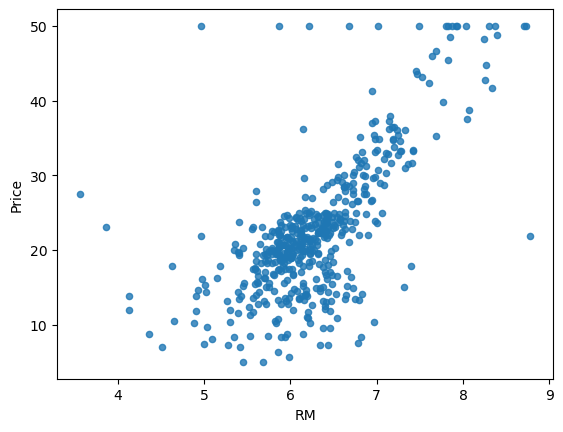

In [22]:
housing.plot(kind='scatter',x='RM',y='Price',alpha=0.8)
plt.show()

In [23]:
##You can add a new columns such as tax per rooom
housing['TAX_ROOM'] = housing['TAX']/housing['RM']
housing.head()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAX_ROOM
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,45.019011
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,37.688834
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,33.681280
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,31.723350
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,31.061984


In [24]:
X = strat_train_set.drop('Price',axis=1)
Y = strat_train_set.Price
X.isna().sum()
# Y.isna().sum()

 CRIM      0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         4
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
 B         0
LSTAT      0
dtype: int64

## Missing attributes
    1. Three ways to handle missing attributes
    2.set the missing attributes with mean mode or median
    2.get red of that column which has missing values
    3. get rid of missing values bcz it doesnt effect your data

In [25]:
#Drop the missing values
missing_values = housing.dropna(subset=['RM'])
missing_values.shape   
#Now total rows are 501 bcz missing data is removed

(501, 15)

In [26]:
#Drop the column that has missig values
housing.drop(['RM'],axis=1).shape
#NOw total columns are 14 bcz AM column has droped

(506, 14)

In [27]:
housing.fillna(housing['RM'].median())

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAX_ROOM
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,45.019011
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,37.688834
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,33.681280
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,31.723350
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,41.407553
502,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,44.607843
503,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,39.134174
504,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,40.182514


# Sklearn to fill the empty data or missing data

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [29]:
imputer.statistics_#You can see what imputer has done or fill the data
#one more thing it works on all the colums

array([2.12000000e+01, 2.56510000e-01, 0.00000000e+00, 9.69000000e+00,
       0.00000000e+00, 5.38000000e-01, 6.20800000e+00, 7.75000000e+01,
       3.20745000e+00, 5.00000000e+00, 3.30000000e+02, 1.90500000e+01,
       3.91440000e+02, 1.13600000e+01, 5.36078965e+01])

In [30]:
imputer_file = imputer.transform(housing)

In [31]:
#NOw make a new data to mix all the values with origanl frame
housing2 = pd.DataFrame(imputer_file,columns=housing.columns)
housing2.shape
#NOw we has completely fill all the missing data with imputer

(506, 15)

## What is features scaling-->all values of a sheet should be in one scale
    1.MinMaxScaler()-->(value-min_value)/(max_value-min_value)
    MinMaxScaler()--->from sklearn
    2.StandardScaler()-->(value-mean)/std
     StandardScaler()--->from sklearn


## Creating the pipeline
    1. Now we would do all the work with pipeline that we has done before with separate

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
housing3 = my_pipeline.fit_transform(strat_train_set)

In [33]:
housing3#it is a numpy array

array([[-0.06501087, -0.43942006,  3.12628155, ..., -0.97491834,
         0.41164221, -0.86091034],
       [ 0.21235476, -0.44352175,  3.12628155, ..., -0.69277865,
         0.39131918, -0.94116739],
       [-0.61974213,  0.15682292, -0.4898311 , ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [ 2.27126115, -0.43525657, -0.4898311 , ..., -0.22254583,
         0.41831233, -1.27603303],
       [-0.89710776,  0.14210728, -0.4898311 , ...,  0.81196637,
        -3.15239177,  0.73869575],
       [ 0.08433985, -0.43974024, -0.4898311 , ..., -0.97491834,
         0.41070422,  0.09940681]])

In [34]:
housing3.shape

(404, 14)

In [36]:
#Selecting Model for Dragon Real Estate
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing3,Y)

LinearRegression()

In [37]:
some_data = housing.iloc[:5]

In [38]:
some_labels = Y.iloc[:5]

In [40]:
# preapred_data = my_pipeline.transform(some_data)

# Dragon Real Estate Machine Learning Project

In [41]:
import pandas as pd

In [42]:
housing = pd.read_csv("data/data.csv")
housing.head()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    506 non-null    float64
 1    CRIM    506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       501 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12   B       506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [44]:
housing.describe()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.281862,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702134,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

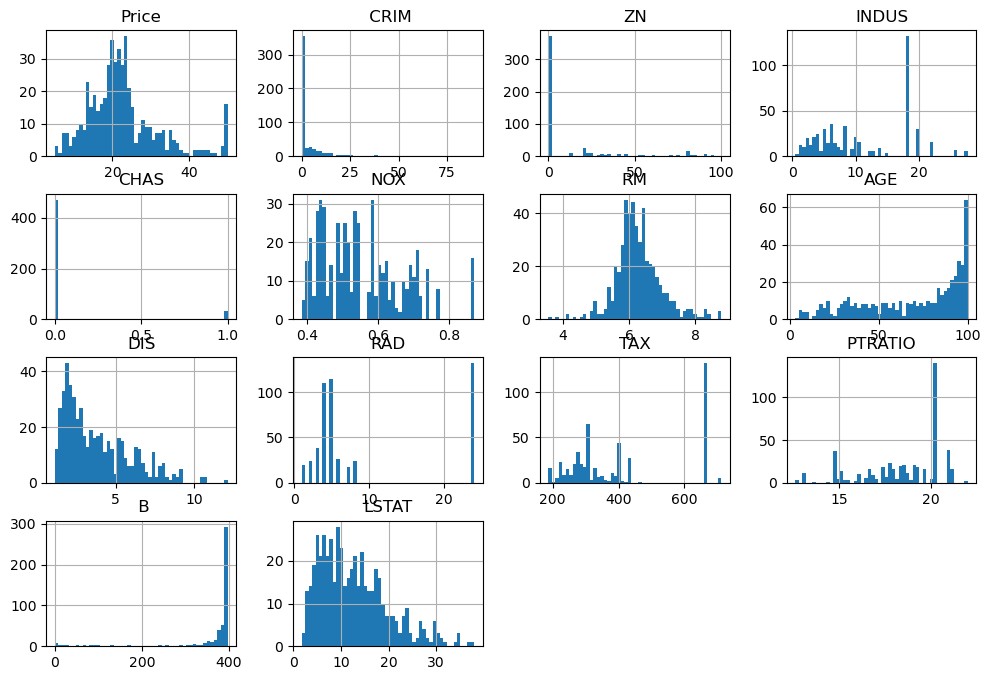

In [48]:
housing.hist(bins=50,figsize=(12,8))
plt.show()

In [49]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [54]:
# housing.isna().sum()
housing.isna().sum()

Price      0
 CRIM      0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
 B         0
LSTAT      0
dtype: int64

In [68]:
housing_corr = housing.corr()
housing_corr['Price'].sort_values(ascending=False)

Price      1.000000
RM         0.692270
ZN         0.360445
 B         0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
 CRIM     -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

In [57]:
#Fill the data using pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipe = Pipeline({
    ('imputer',SimpleImputer()),
    ('scalar',StandardScaler())
})

housing_2 = my_pipe.fit_transform(housing)

In [59]:
housing2_df = pd.DataFrame(housing_2,columns=housing.columns)
housing2_df.head()

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.159686,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.419993,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.101524,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.199349,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.324247,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.293969,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.182758,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.026045,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.487503,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.239525,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [60]:
housing2_df.isna().sum()

Price      0
 CRIM      0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
 B         0
LSTAT      0
dtype: int64

In [61]:
X = housing2_df.drop(['Price'],axis=1)
Y = housing2_df.Price

In [62]:
print(len(X))
print(len(Y))

506
506


In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [64]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

404
404
102
102


# Choosing the model for training and testing

## Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

In [71]:
y_prediction = linear_reg_model.predict(x_test)

In [72]:
linear_reg_model.score(x_test,y_test)

0.6703266524017377

In [73]:
linear_reg_model.score(x_train,y_train)

0.7465596439777129

In [78]:
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test,y_prediction)
# conf_mat

In [79]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test,y_prediction))

In [81]:
from sklearn.metrics import mean_absolute_error
import numpy as np
error = mean_absolute_error(y_test,y_prediction)
sqrt_error = np.sqrt(error)

In [82]:
sqrt_error

0.5922541019296114

## Choosing DecisionTree Regressor model

In [86]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

In [87]:
tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [88]:
y_prediction = tree_model.predict(x_test)

In [90]:
tree_model.score(x_train,y_train)

1.0

In [89]:
tree_model.score(x_test,y_test)

0.8333553002741884

In [93]:
from sklearn.metrics import mean_absolute_error
import numpy as np
error = mean_absolute_error(y_test,y_prediction)
sqrt_error = np.sqrt(error)
sqrt_error

0.5396235762704995

In [98]:
from sklearn.model_selection import cross_val_score
cross_model = cross_val_score(tree_model,X,Y,scoring="neg_mean_squared_error")
error_score = np.sqrt(-cross_model)
error_score

array([0.46231003, 0.79970966, 0.63600049, 0.70484513, 0.90541173])

In [99]:
def print_Scores(score):
    print("Scores",error_score)
    print("Scores",error_score.mean())    
    print("Scores",error_score.std())    

In [100]:
print_Scores(error_score)

Scores [0.46231003 0.79970966 0.63600049 0.70484513 0.90541173]
Scores 0.7016554099917991
Scores 0.15015873527163343


In [101]:
from sklearn.ensemble import RandomForestRegressor
forest_model  = RandomForestRegressor()
forest_model.fit(x_train,y_train)

RandomForestRegressor()

In [103]:
y_prediction = forest_model.predict(x_test)

In [104]:
forest_model.score(x_train,y_train)

0.9745860804842584

In [105]:
forest_model.score(x_test,y_test)

0.8675950816910687

In [106]:
from sklearn.model_selection import cross_val_score
cross_model = cross_val_score(forest_model,X,Y,scoring="neg_mean_squared_error")
error_score = np.sqrt(-cross_model)
error_score

array([0.35548172, 0.39919503, 0.53690447, 0.70293686, 0.44883174])

In [107]:
print_Scores(error_score)

Scores [0.35548172 0.39919503 0.53690447 0.70293686 0.44883174]
Scores 0.48866996196586765
Scores 0.12293805694803364


In [109]:
import pickle
pickle.dump(forest_model,open("House_predictor_model.pkl",'wb'))

In [110]:
load_model = pickle.load(open("House_predictor_model.pkl","rb"))

In [111]:
load_model.predict(x_test)

array([ 0.01852345,  1.26514792, -0.6085981 ,  0.17622896, -0.60750972,
       -0.10370104, -0.35000025, -0.8031995 , -0.16269095, -0.17977843,
       -0.31441039, -0.35206816, -1.47450907, -0.08639588, -0.33508951,
        0.38824436, -0.36991751, -1.52816594,  2.4790123 , -0.81604233,
        0.23380398,  0.16273311, -0.84336053,  0.03223697, -0.79111854,
       -0.81343023, -0.11306106, -0.92542399, -0.34804117, -0.19066218,
       -0.33138904,  0.0758808 ,  0.90718145, -0.28469776, -0.88548064,
       -0.70949044,  1.31945782, -0.34074906, -0.2165655 ,  0.17154894,
       -0.35065327,  0.75284991,  2.46986996, -0.34031371, -0.02076688,
       -0.95818407, -0.7488896 ,  0.18645968, -0.39418826,  0.6055928 ,
       -0.16628259,  1.25437301, -0.59945575,  0.36941548,  2.57283021,
       -0.07703585, -0.76401801,  1.19211797, -0.04939114, -0.20219895,
        0.2788627 ,  1.29083356,  1.07250558, -0.42640416,  0.47128736,
       -0.56430124, -0.96090501,  0.08600269,  0.56934992, -0.76

# Image Processing using Open CV

# Image classification using Open cv and Machine learnig

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
%matplotlib inline

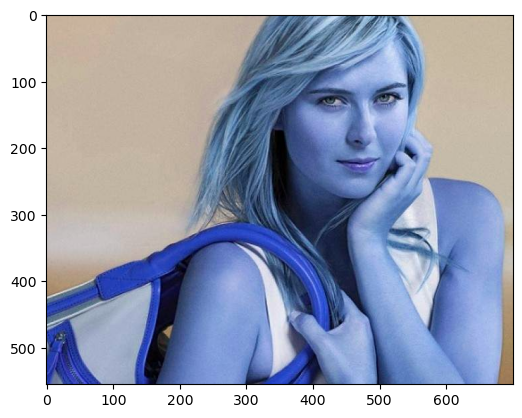

In [9]:
img = cv.imread("images/sharapova1.jpg")
plt.imshow(img)
plt.show()

In [10]:
img.shape
#After running this file you would se that image is 3 dimension  widht hight and RGB channel

(555, 700, 3)

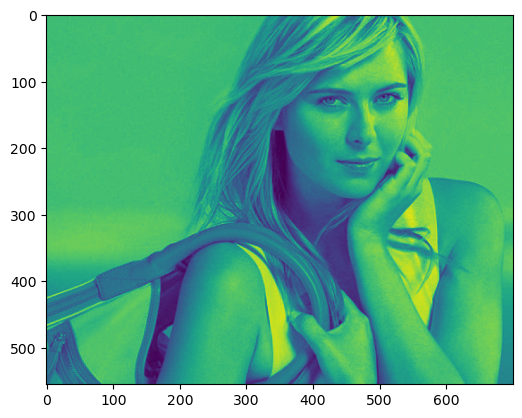

In [11]:
#If we convert the image into gray or blacken white than RGB will be removed
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

In [12]:
gray.shape

(555, 700)

## Open CV pre-trained image Classifier

1.detectMultiScale():

The detectMultiScale() method is used to identify faces of different sizes in the input image.

    2.grey_image:
    
The first parameter in this method is called grey_image, which is the grayscale image we created previously.

    3. ScaleFactor:
    
This parameter is used to scale down the size of the input image to make it easier for the algorithm to detect
larger faces. In this case, we have specified a scale factor of 1.1, indicating that we want to reduce the image
size by 10%.

    4. minNeighbors:
    
The cascade classifier applies a sliding window through the image to detect faces in it. You can think of these
windows as rectangles.

    5.minSize:
Finally, the minSize parameter sets the minimum size of the object to be detected. The model will ignore faces that are smaller than the minimum size specified.



## Face detection using open Cv and Classifier

In [13]:
face_cascade = cv.CascadeClassifier("haarcade/haarcascade_frontalface_default.xml")
eye_cascade = cv.CascadeClassifier("haarcade/haarcascade_eye.xml")
face = face_cascade.detectMultiScale(gray,1.3,5)

#After seeing the output you would know that image has fourt values x,y,w,h

In [14]:
(x,y,w,h) = face[0]
x,y,w,h

(352, 38, 233, 233)

## Now draw a red color or any color rectangle around the face

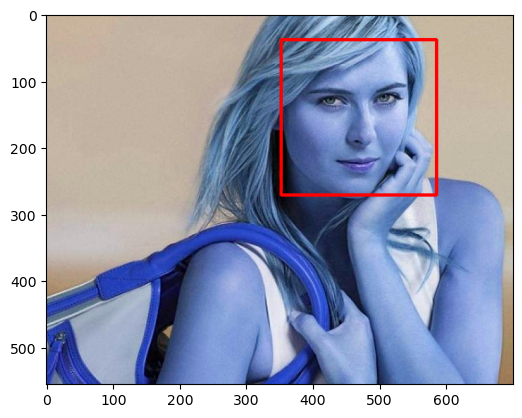

In [15]:
face_img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
"""
first value is image
2nd value is where to stard rectangle
3rd value or tupple is where to end rectangle
4th value is color of rectangle
5th value is thickness of triangle
"""
plt.imshow(face_img)
plt.show()

## Eye detection using open Cv and Classifier

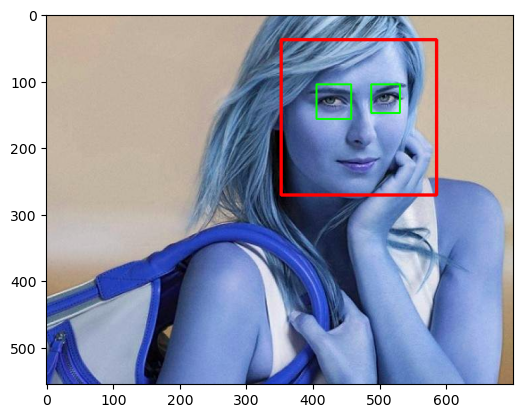

In [16]:
cv.destroyAllWindows()
for (x,y,w,h) in face:#face is values in orignal images
    face_img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
    roi_gray = gray[y:y+h,x:x+w] 
    roi_color = face_img[y:y+h,x:x+w]
    eyes =eye_cascade.detectMultiScale(roi_color,1.3,5)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

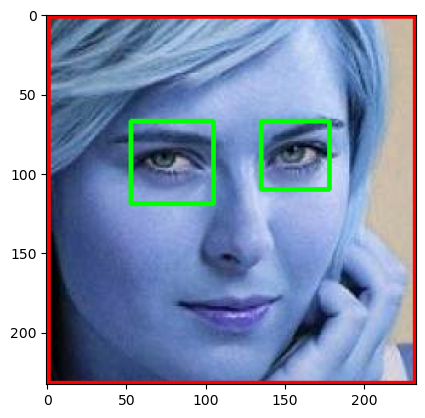

In [17]:
plt.imshow(roi_color,cmap='gray')
plt.show()

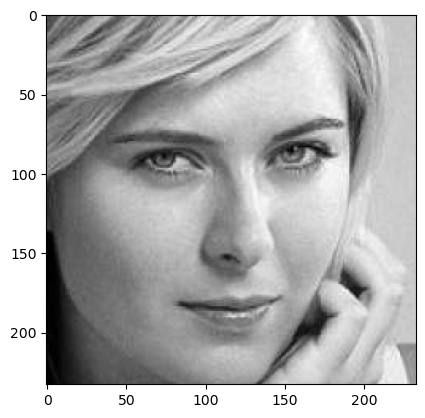

In [18]:
plt.imshow(roi_gray,cmap='gray')
plt.show()

In [19]:
#Writing a function if i give him a img and it return a croped image
def get_cropped_image_if_2_eyes(image_path):
    img = cv.imread(image_path)
#     gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for (x,y,w,h) in faces:
#         roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
        if len(eyes) >= 2:
            return roi_color

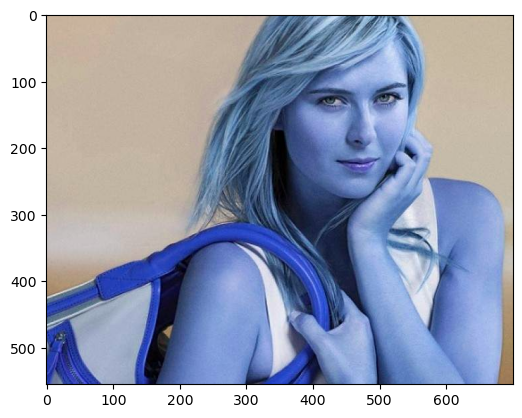

In [20]:
origanal_image = cv.imread("images/sharapova1.jpg")
plt.imshow(origanal_image)
plt.show()

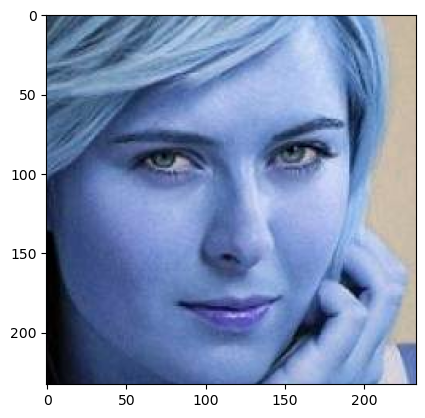

In [21]:
# get cropped images
get_cropped_image = get_cropped_image_if_2_eyes("images/sharapova1.jpg")
plt.imshow(get_cropped_image)
plt.show()

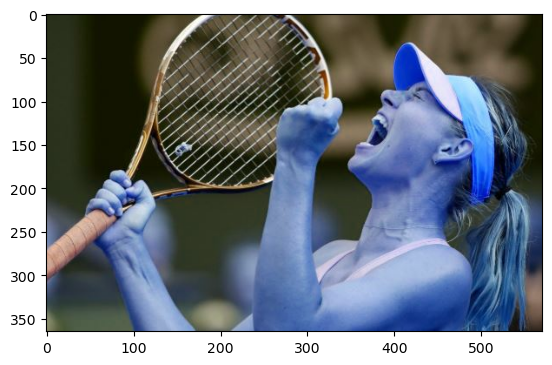

In [22]:
#load 2nd image that has no eyes
image_with_no_eyes = cv.imread("images/sharapova2.JPG")
plt.imshow(image_with_no_eyes)
plt.show()

In [23]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('images/sharapova2.jpg')
cropped_image_no_2_eyes

## Now Use os model to to clean the data

In [24]:
path_to_data = "dataset/"
path_to_cropped_data = "dataset/cropped_images"

In [25]:
import os
img_dir = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dir.append(entry.path)

In [26]:
img_dir

['dataset/cropped_imagesMessi',
 'dataset/cropped_images',
 'dataset/cropped_imagesmaria sharapova',
 'dataset/cropped_imagesBabarAzam']

In [27]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [28]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img in img_dir:
    count = 1
    celebrity_name = img.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped_imagesMessi
Generating cropped images in folder:  dataset/cropped_imagescropped_imagesMessi
cropped_images
cropped_imagesmaria sharapova
Generating cropped images in folder:  dataset/cropped_imagescropped_imagesmaria sharapova
cropped_imagesBabarAzam
Generating cropped images in folder:  dataset/cropped_imagescropped_imagesBabarAzam


In [29]:
import pywt
import numpy as np
import cv2 as cv

In [30]:
def w2d(img,mode='haar',level=1):
    imArray = img
    imArray = cv.cvtColor(imArray,cv.COLOR_BGR2GRAY)
    imArray = np.float32(imArray)
    imArray /=255
    coeff = pywt.wavedec2(imArray,mode,level=level)
    coeffs_h = list(coeff)
    coeffs_h *=0
    imArray_h = pywt.waverec(coeffs_h,mode)
    imArray_h *=255
    imArray_h = np.uint8(imArray_h)
    return imArray_h

In [33]:
im_har = w2d(cropped_folder,'db1',5)
plt.imshoq(im_har,cmap='gray')

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
